In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [ ]:
# Load the training and testing data from CSV files
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Perform one-hot encoding on categorical variables
train_X = pd.get_dummies(train_data.drop('Low_Cap_Price', axis=1))
train_y = train_data['Low_Cap_Price']
test_X = pd.get_dummies(test_data)

# Identify missing columns in the testing data
missing_cols = set(train_X.columns) - set(test_X.columns)

# Add missing columns to the testing data with zero values
for col in missing_cols:
    test_X[col] = 0

In [ ]:
# Check if 'Date' column is present in the training and testing data
assert 'Date' in train_data.columns, "Missing 'Date' column in training data"
assert 'Date' in test_data.columns, "Missing 'Date' column in testing data"

In [ ]:
# Reorder the columns in the testing data to match the training data
test_X = test_X[train_X.columns]

# Split the training data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(train_X, train_y)

LinearRegression()

In [ ]:
print("Training Data Columns:", train_data.columns)
print("Testing Data Columns:", test_data.columns)

Training Data Columns: Index(['Item_Id', 'Date', 'State_of_Country', 'Market_Category',
       'Product_Category', 'Grade', 'Demand', 'Low_Cap_Price',
       'High_Cap_Price'],
      dtype='object')
Testing Data Columns: Index(['Item_Id', 'Date', 'State_of_Country', 'Market_Category',
       'Product_Category', 'Grade', 'Demand', 'High_Cap_Price'],
      dtype='object')


In [ ]:
# Predict the Low_Cap_Price for the training, validation, and testing data
train_predictions = model.predict(train_X)
val_predictions = model.predict(val_X)
test_predictions = model.predict(test_X)

# Calculate MSE and RMSE for training, validation, and testing data
train_mse = mean_squared_error(train_y, train_predictions)
val_mse = mean_squared_error(val_y, val_predictions)
train_rmse = sqrt(train_mse)
val_rmse = sqrt(val_mse)

# Print MSE and RMSE values
print('Training MSE:', train_mse)
print('Validation MSE:', val_mse)
print('Training RMSE:', train_rmse)
print('Validation RMSE:', val_rmse)

# Calculate the coefficients of the linear regression model
coefficients = pd.DataFrame({'Features': train_X.columns, 'Coefficients': model.coef_})
print(coefficients)

Training MSE: 8.763928612902534e-16
Validation MSE: 2052583.1096183981
Training RMSE: 2.9603933206421294e-08
Validation RMSE: 1432.683883352639
               Features  Coefficients
0      State_of_Country     42.729276
1       Market_Category      0.766098
2      Product_Category     26.661700
3                 Grade   -387.242206
4                Demand     -0.046447
...                 ...           ...
10869   Date_2010-06-05   -264.350604
10870   Date_2010-06-06    422.326210
10871   Date_2010-06-07    298.785834
10872   Date_2010-06-08   -446.122344
10873   Date_2010-06-09      0.000000

[10874 rows x 2 columns]


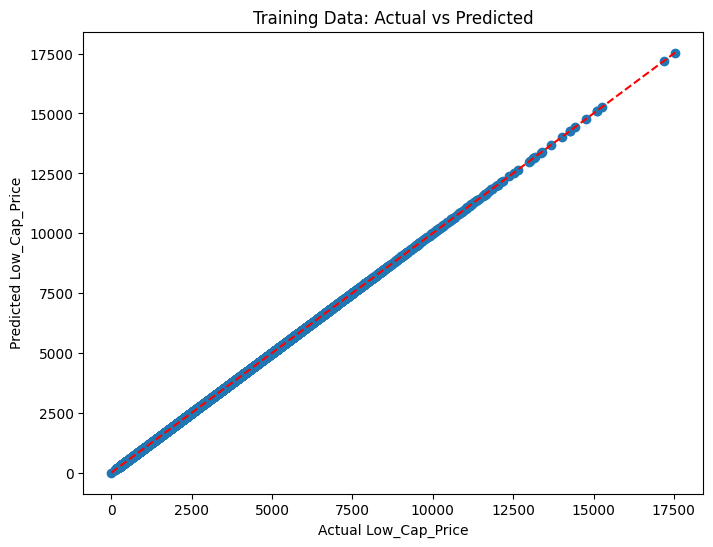

In [ ]:
# Plotting the actual vs predicted values for the training data
plt.figure(figsize=(8, 6))
plt.scatter(train_y, train_predictions)
plt.plot([train_y.min(), train_y.max()], [train_y.min(), train_y.max()], 'r--')
plt.xlabel('Actual Low_Cap_Price')
plt.ylabel('Predicted Low_Cap_Price')
plt.title('Training Data: Actual vs Predicted')
plt.show()

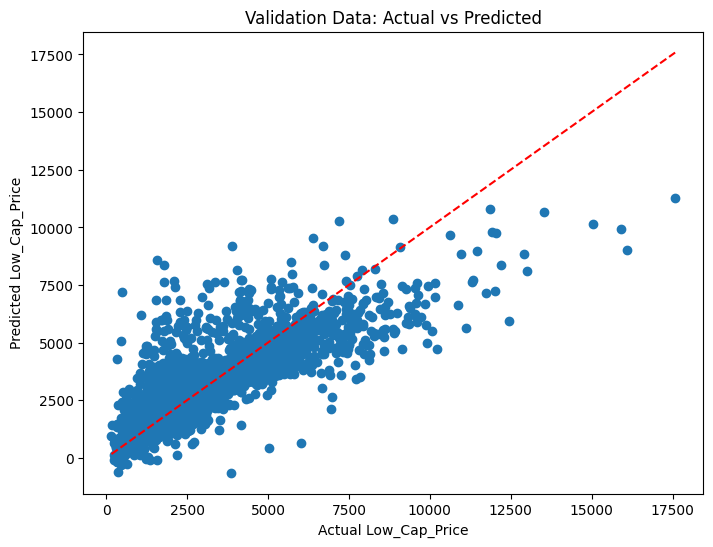

In [ ]:
# Plotting the actual vs predicted values for the validation data
plt.figure(figsize=(8, 6))
plt.scatter(val_y, val_predictions)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'r--')
plt.xlabel('Actual Low_Cap_Price')
plt.ylabel('Predicted Low_Cap_Price')
plt.title('Validation Data: Actual vs Predicted')
plt.show()

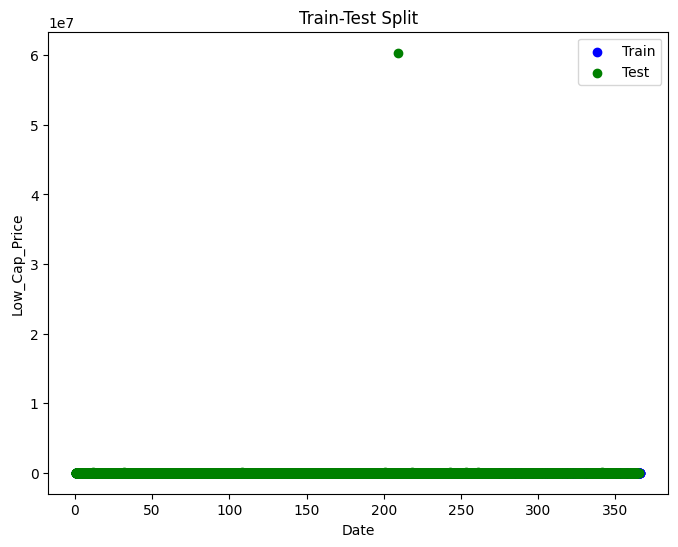

In [ ]:
# Convert 'Date' column to numeric representation
train_data['Date_numeric'] = pd.to_datetime(train_data['Date']).dt.dayofyear
test_data['Date_numeric'] = pd.to_datetime(test_data['Date']).dt.dayofyear

# Plotting the train-test split
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Date_numeric'], train_data['Low_Cap_Price'], color='blue', label='Train')
plt.scatter(test_data['Date_numeric'], test_predictions, color='green', label='Test')
plt.xlabel('Date')
plt.ylabel('Low_Cap_Price')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [ ]:
# Create a submission dataframe with the predicted prices
submission_df = pd.DataFrame({'Low_Cap_Price': test_predictions})

# Save the submission dataframe to a CSV file
submission_df.to_csv('submission.csv', index=False)